# <center>Using SQLlite with Python</center>
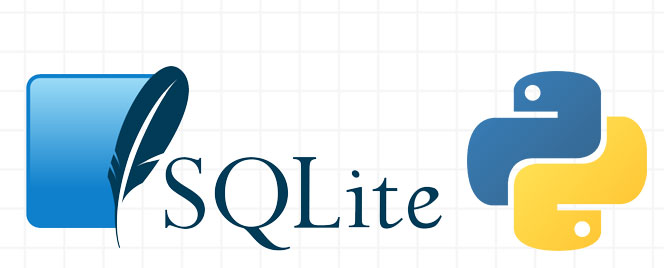

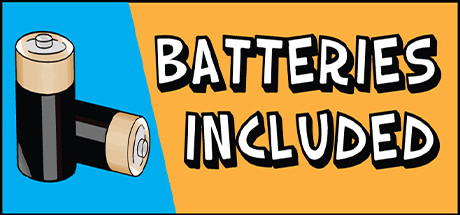

## Documentation at: https://docs.python.org/3/library/sqlite3.html

### https://www.dataquest.io/blog/python-pandas-databases

#  SQLite GUI
https://sqlitebrowser.org/

In [1]:
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.32.3


### We just want an in memory database...

## 1) Connect to the database.  In Memory in this case.

In [36]:
db = sqlite3.connect(':memory:')

## 2) Create a cursor to use to execute SQL statements.

In [37]:
cursor = db.cursor()

In [38]:
cursor

## 3) Use the cursor to execute SQL statements to the database.
Note:  We always execute a commit after the statement.

In [39]:
cursor.execute('''CREATE TABLE IF NOT EXISTS books(id INTEGER PRIMARY KEY, 
                   title TEXT, author TEXT, price TEXT, year TEXT)
''')
db.commit()

In [40]:
cursor.execute('''INSERT INTO books values (1, 'Pro PowerShell', 'Bryan Cafferky', 35.00, 2015)
''')
cursor.execute('''INSERT INTO books values (2, "'Hithiker's Guide to the Galaxy", 'Douglas Adams', 12.00, 199)
''')
db.commit()

In [41]:
lstbooks = cursor.execute('''select * from books;''').fetchall()
db.commit()
print(lstbooks)

[(1, 'Pro PowerShell', 'Bryan Cafferky', '35.0', '2015'), (2, "'Hithiker's Guide to the Galaxy", 'Douglas Adams', '12.0', '199')]


## Not very easy to read the output, what type is returned?

In [9]:
type(lstbooks)

list

## Dataframes are much easier to work with so let's use a dataframe instead.

In [10]:
import sqlite3
import pandas as pd

# convert query results to a dataframe
dfbook = pd.read_sql_query("SELECT * FROM books", db)
dfbook.head()

,id,title,author,price,year
0,1,Pro PowerShell,Bryan Cafferky,35.0,2015
1,2,'Hithiker's Guide to the Galaxy,Douglas Adams,12.0,199


## We can drop the table since we are done.

In [11]:
cursor = db.cursor()
cursor.execute('''DROP TABLE books''')
db.commit()

In [12]:
booksdf = cursor.execute('''select * from books;''').fetchall()
db.commit()

OperationalError: no such table: books

In [43]:
cursor.close()
conn.close()

# Chinook, SQLite's Answer to AdventureWorks...

In [13]:
ls

 Volume in drive D is DATADRIVE0
 Volume Serial Number is E6D7-EDE3

 Directory of D:\DocumentsD\Presentations\PythonSQL\Notebook

09/19/2020  10:15 AM    <DIR>          .
09/19/2020  10:15 AM    <DIR>          ..
09/19/2020  09:48 AM    <DIR>          .ipynb_checkpoints
03/19/2019  05:05 PM           884,736 chinook.db
07/18/2019  10:46 AM    <DIR>          Data
09/19/2020  10:03 AM           104,895 PandasSQL.ipynb
09/19/2020  10:15 AM           617,405 PythonSQLite.ipynb
07/19/2019  09:39 AM            82,629 PythonWithSQL.ipynb
               4 File(s)      1,689,665 bytes
               4 Dir(s)  764,859,674,624 bytes free


## Sample Database

http://www.sqlitetutorial.net/sqlite-sample-database/
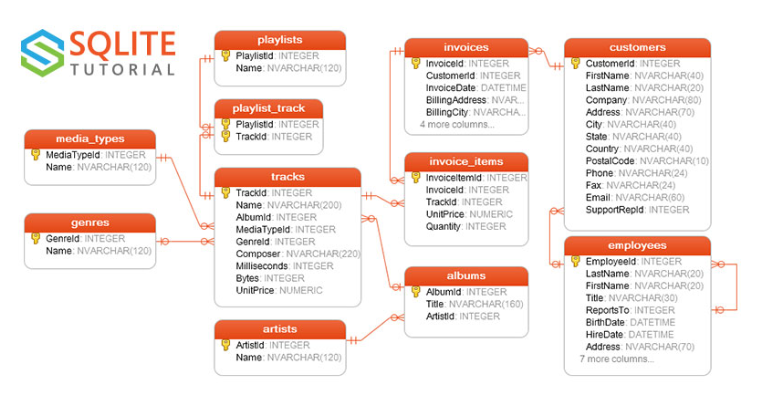

In [44]:
conn = sqlite3.connect("chinook.db")
cur = conn.cursor()

albums = cur.execute("""select * from albums order by title limit 3;""").fetchall()
print(albums)

[(156, '...And Justice For All', 50), (257, '20th Century Masters - The Millennium Collection: The Best of Scorpions', 179), (296, 'A Copland Celebration, Vol. I', 230)]


In [15]:
type(albums)

list

In [16]:
import sqlite3
import pandas as pd

# convert query results to a dataframe

dfalbum = pd.read_sql_query("SELECT * FROM albums", conn)
dfalbum.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [17]:
pd.read_sql_query("select name from sqlite_master where type = 'table';", conn)

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [17]:
dftablist = pd.read_sql_query("select name from sqlite_master where type = 'table';", conn)

In [18]:
dftablist.dtypes

name    object
dtype: object

In [19]:
dftablist

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


## Suppressing the default index...

In [20]:
qry = '''
select substr(a.name, 1, 10) as Artist,
       substr(title,1, 15) as Album,
       t.name as Song
from albums r
join artists a
on (r.artistid = a.artistid)
join tracks t 
on (r.albumid = t.albumid)
order by a.name, title
limit 15;
'''

pd.read_sql_query(qry, conn, index_col = 'Artist')  # index_col replaces the default dataframe index

,Album,Song
Artist,,
AC/DC,For Those About,For Those About To Rock (We Salute You)
AC/DC,For Those About,Put The Finger On You
AC/DC,For Those About,Let's Get It Up
AC/DC,For Those About,Inject The Venom
AC/DC,For Those About,Snowballed
AC/DC,For Those About,Evil Walks
AC/DC,For Those About,C.O.D.
AC/DC,For Those About,Breaking The Rules
AC/DC,For Those About,Night Of The Long Knives


## Let's create a new table from a query 

In [27]:
qry = '''
create table if not exists top15 as
select substr(a.name, 1, 10) as Artist,
       substr(title,1, 15) as Album,
       t.name as Song
from albums r
join artists a
on (r.artistid = a.artistid)
join tracks t 
on (r.albumid = t.albumid)
order by a.name, title
limit 15;
'''

albums = cur.execute(qry)

In [28]:
pd.read_sql_query('select * from top15', conn)

,Artist,Album,Song
0,AC/DC,For Those About,For Those About To Rock (We Salute You)
1,AC/DC,For Those About,Put The Finger On You
2,AC/DC,For Those About,Let's Get It Up
3,AC/DC,For Those About,Inject The Venom
4,AC/DC,For Those About,Snowballed
5,AC/DC,For Those About,Evil Walks
6,AC/DC,For Those About,C.O.D.
7,AC/DC,For Those About,Breaking The Rules
8,AC/DC,For Those About,Night Of The Long Knives
9,AC/DC,For Those About,Spellbound


## Let's create a new table from a dataframe

In [48]:
best_acdcDF = pd.read_sql_query('select * from top15 where artist = "AC/DC"', conn)

### The works with full scale DBMSs like PostgreSQL too!

In [49]:
best_acdcDF.to_sql('best_acdc', con=conn, if_exists='append')

In [50]:
 pd.read_sql_query('select * from best_acdc', conn)

,index,Artist,Album,Song
0,0,AC/DC,For Those About,For Those About To Rock (We Salute You)
1,1,AC/DC,For Those About,Put The Finger On You
2,2,AC/DC,For Those About,Let's Get It Up
3,3,AC/DC,For Those About,Inject The Venom
4,4,AC/DC,For Those About,Snowballed
5,5,AC/DC,For Those About,Evil Walks
6,6,AC/DC,For Those About,C.O.D.
7,7,AC/DC,For Those About,Breaking The Rules
8,8,AC/DC,For Those About,Night Of The Long Knives
9,9,AC/DC,For Those About,Spellbound


# Let's close the connection. 

In [51]:
cur.close()
conn.close()

In [ ]:
#  _____

In [31]:
pip install -U psycopg2

Note: you may need to restart the kernel to use updated packages.


# What about using a real database like PostgreSQL?

In [32]:
import psycopg2 as pg
import pandas.io.sql as psql
 
# get connected to the database
connection = pg.connect("dbname=Development user=bryan password=bryan")
 
df = pd.read_sql_query('select * from person',con=connection)

In [33]:
df

,ID,FirstName,LastName,Prefix,Address1,Address2,City,StateCD,ZipCD
0,1,Tom,Toms,Mr.,23 Drum Street,,Ludwig,PA,1234
1,2,Mary,Jones,,15 Mocking Bird Lane,Apt 22,Worcester,MA,99999
2,3,Bob,Miller,,35 Smith Street,,Boston,MA,99999
3,4,Robin,Gomez,,42 Universe Street,,Boston,MA,99999


In [35]:
conn.close()

#  However, this will not work with SQL Server.